# Visualizing a Categorical and a Quantitative Variable
**Categorical variables are present in nearly every dataset, but they are especially prominent in survey data. In this chapter, you will learn how to create and customize categorical plots such as box plots, bar plots, count plots, and point plots. Along the way, you will explore survey data from young people about their interests, students about their study habits, and adult men about their feelings about masculinity.**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

As a reminder, to create a count plot, we'll use the `catplot()` function and specify the name of the categorical variable to count (`x=____`), the Pandas DataFrame to use (`data=____`), and the type of plot (`kind="count"`).

In [2]:
survey_data = pd.read_csv('survey_data.csv')

- Use `sns.catplot()` to create a count plot using the `survey_data` DataFrame with `"Internet usage"` on the x-axis.

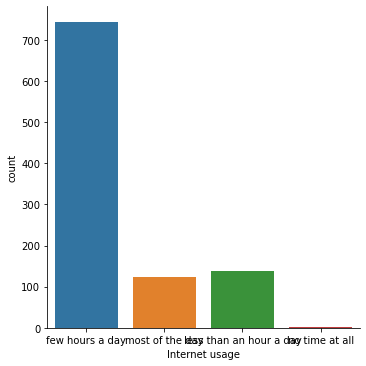

In [3]:
# Create count plot of internet usage
sns.catplot(x='Internet usage', data=survey_data, kind='count')

# Show plot
plt.show()

- Make the bars horizontal instead of vertical.

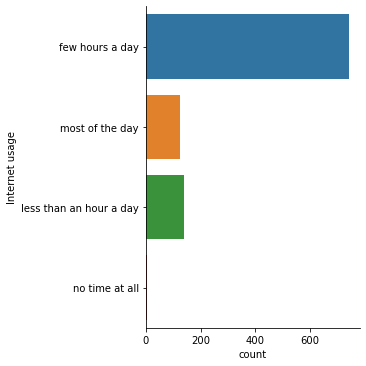

In [4]:
# Change the orientation of the plot
sns.catplot(y="Internet usage", data=survey_data,
            kind="count")

# Show plot
plt.show()

- Create column subplots based on `"Age Category"`, which separates respondents into those that are younger than 21 vs. 21 and older.

In [21]:
survey_data.dropna(subset=['Age'], inplace=True)
conditions = [(survey_data['Age'] < 21), (survey_data['Age'] >= 21)]
values = ['Less than 21', '21+']
survey_data['Age Category'] = np.select(conditions, values)

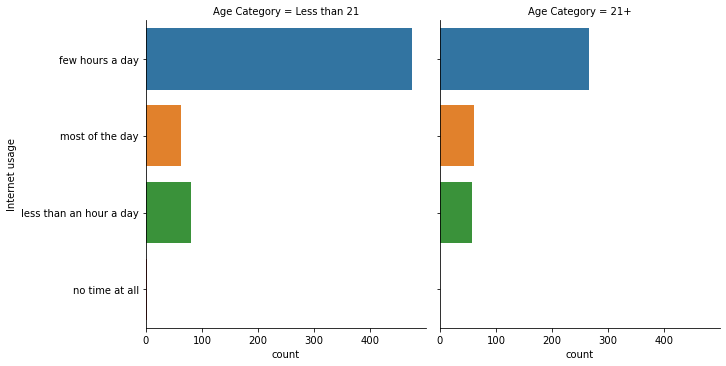

In [22]:
# Create column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data, 
            kind="count", col='Age Category')

# Show plot
plt.show()

*It looks like most young people use the internet for a few hours every day, regardless of their age.*

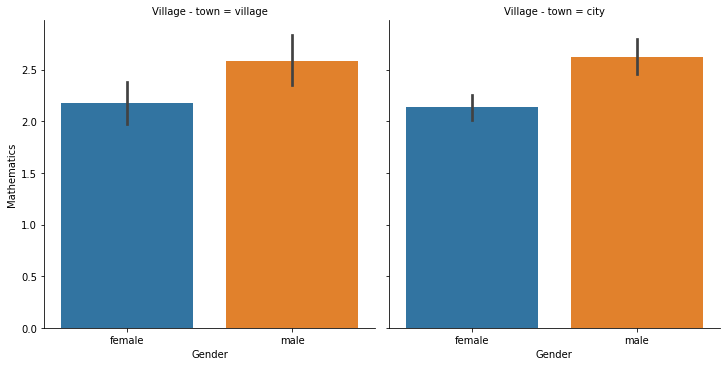

In [27]:
sns.catplot(y='Mathematics', x='Gender', data=survey_data, 
            kind='bar', col='Village - town')

plt.show()

*This plot shows us that males score higher in math than females, regardless of where they live.*

## Customizing bar plots
In this exercise, we'll explore data from students in secondary school. The `"study_time"` variable records each student's reported weekly study time as one of the following categories: `"<2 hours"`, `"2 to 5 hours"`, `"5 to 10 hours"`, or `">10 hours"`. Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

In [29]:
student_data = pd.read_csv('student_data.csv')

- Use `sns.catplot()` to create a bar plot with `"study_time"` on the x-axis and final grade (`"G3"`) on the y-axis, using the `student_data` DataFrame.

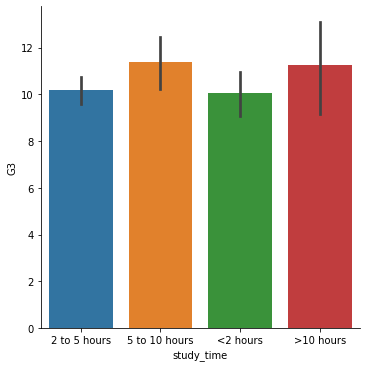

In [30]:
# Create bar plot of average final grade in each study category
sns.catplot(x='study_time', y='G3', data=student_data, kind='bar')

# Show plot
plt.show()

- Using the `order` parameter, rearrange the categories so that they are in order from lowest study time to highest.

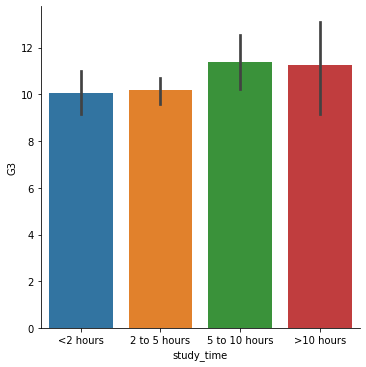

In [31]:
# Rearrange the categories
sns.catplot(x="study_time", y="G3", data=student_data, kind="bar", 
            order=['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])

# Show plot
plt.show()

- Update the plot so that it no longer displays confidence intervals.

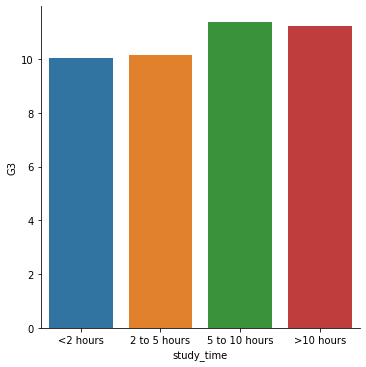

In [36]:
# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3", data=student_data, kind="bar", 
            order=['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'], 
            ci=None)

# Show plot
plt.show()

*Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.*

---

## Create and interpret a box plot
Let's continue using the `student_data` dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the Pandas DataFrame to use (`data=____`), and the type of plot (`kind="box"`).

- Use `sns.catplot()` and the `student_data` DataFrame to create a box plot with `"study_time"` on the x-axis and `"G3"` on the y-axis. Set the ordering of the categories to `study_time_order`.

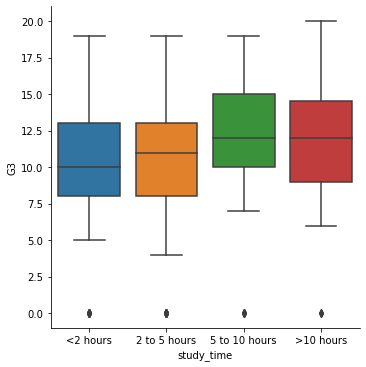

In [37]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x='study_time', y='G3', data=student_data, 
            kind='box', order=study_time_order)

# Show plot
plt.show()

### Question
Which of the following is a correct interpretation of this box plot?

1. ~The 75th percentile of grades is highest among students who study more than 10 hours a week.~

2. ~There are no outliers plotted for these box plots.~

3. ~The 5th percentile of grades among students studying less than 2 hours is 5.0.~

4. The median grade among students studying less than 2 hours is 10.0.

*Answer: 4 - 1) This category has the highest whisker, but the 75th percentile is represented by the top of the colored box. 2) There are outliers plotted as points with grade equal to 0.0 in each category. 3)  The bottom of the whisker is equal to 5.0, but by default the whiskers do not extend from the 5th to 95th percentiles.4) The line in the middle of each box represents the median.*

### What is a box plot?
- Shows the distribution of quantitative data
- See median, spread, skewness, and outliers
- Facilitates comparisons between groups

## Omitting outliers
Now let's use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who have internet access at home and those who don't. To do this, we'll use the `"internet"` variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the `"location"` variable, which is an indicator of whether a student lives in an urban (`"Urban"`) or rural (`"Rural"`) location.

**You can omit outliers in box plots by setting the `sym` parameter equal to an empty string (`""`).**

- Use `sns.catplot()` to create a box plot with the `student_data` DataFrame, putting `"internet"` on the x-axis and `"G3"` on the y-axis.
- Add subgroups so each box plot is colored based on `"location"`.
- Do not display the outliers.

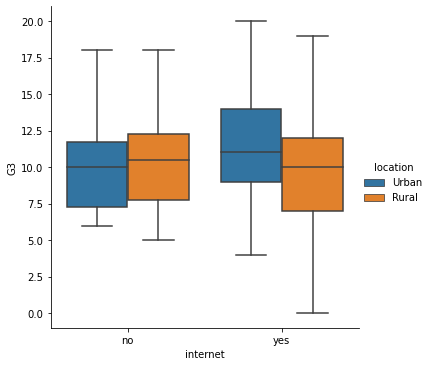

In [38]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x='internet', y='G3', data=student_data, 
            kind='box', hue='location', sym='')

# Show plot
plt.show()

*The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.*

## Adjusting the whiskers
In the lesson we saw that there are multiple ways to define the whiskers in a box plot. In this set of exercises, we'll continue to use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who are in a romantic relationship and those that are not. We'll use the `"romantic"` variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

- Adjust the code to make the box plot whiskers to extend to 0.5 * IQR. Recall: the IQR is the interquartile range.

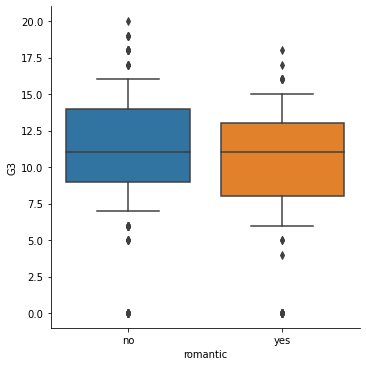

In [40]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3", data=student_data,
            kind="box", whis=0.5)

# Show plot
plt.show()

- Change the code to set the whiskers to extend to the 5th and 95th percentiles.

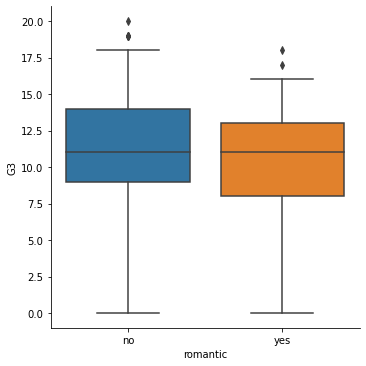

In [41]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3", data=student_data,
            kind="box", whis=[5, 95])

# Show plot
plt.show()

- Change the code to set the whiskers to extend to the min and max values.

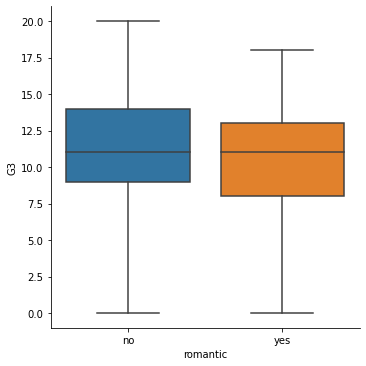

In [42]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3", data=student_data,
            kind="box", whis=[0, 100])

# Show plot
plt.show()

*The median grade is the same between these two groups, but the max grade is higher among students who are not in a romantic relationship.*

### Changing the whiskers using `'whis'`
- By default, the whiskers extend to 1.5 * the interquartile range
- Make them extend to 2.0 * IQR: `whis=2.0`
- Show the 5th and 95th percentiles: `whis=[5, 95]`
- Show min and max values: `whis=[0, 100]`

---

## Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

- Use `sns.catplot()` and the `student_data` DataFrame to create a point plot with `"famrel"` on the x-axis and number of absences (`"absences"`) on the y-axis.

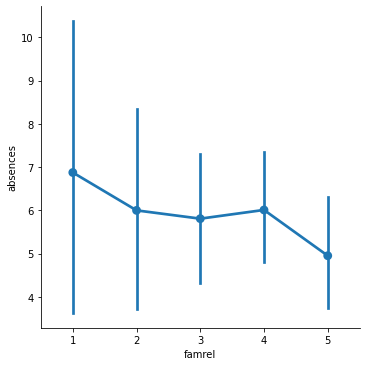

In [43]:
# Create a point plot of family relationship vs. absences
sns.catplot(x='famrel', y='absences', data=student_data, kind='point')
            
# Show plot
plt.show()

- Add "caps" to the end of the confidence intervals with size `0.2`.

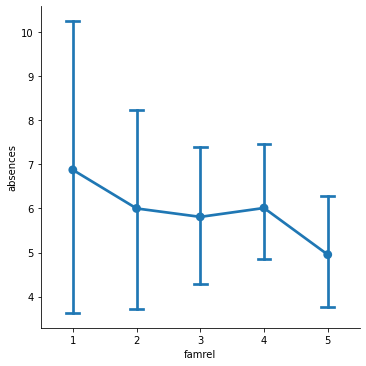

In [47]:
# Add caps to the confidence interval
sns.catplot(x='famrel', y='absences', data=student_data, 
            kind='point', capsize=0.2)
            
# Show plot
plt.show()

- Remove the lines joining the points in each category.

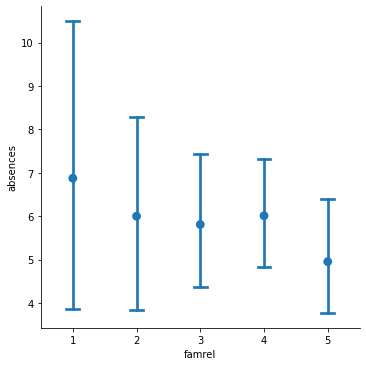

In [48]:
# Remove the lines joining the points
sns.catplot(x='famrel', y='absences', data=student_data, 
            kind='point', capsize=0.2, join=False)
            
# Show plot
plt.show()

*While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.*

### What are point plots?
- Points show mean of quantitative variable
- Vertical lines show 95% confidence intervals

### Point plots vs. line plots
**Both show:**
- Mean of quantitative variable
- 95% confidence intervals for the mean
**Differences:**
- Line plot has ***quantitative*** variable (usually time) on x-axis
- Point plot has ***categorical*** variabele on x-axis

### Point plots vs. bar plots
**Both show:**
- Mean of quantitative variable
- 95% confidence intervals for the mean
**Differences:**
-  In the point plot, it's easier to compare the heights of the subgroup points when they're stacked above each other. 
- In the point plot, it's also easier to look at the differences in slope between the categories than it is to compare the heights of the bars between them.

Point plots with subgroups
Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

- Use `sns.catplot()` and the `student_data` DataFrame to create a point plot with relationship status (`"romantic"`) on the x-axis and number of absences (`"absences"`) on the y-axis. Create subgroups based on the school that they attend (`"school"`)

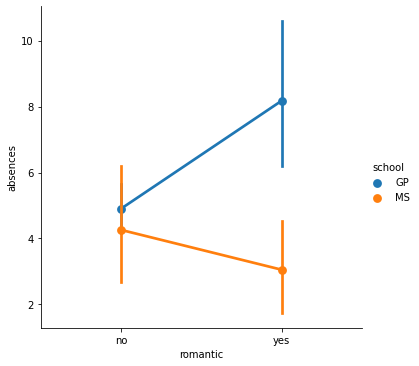

In [50]:
# Create a point plot with subgroups
sns.catplot(x='romantic', y='absences', data=student_data, 
            kind='point', hue='school')

# Show plot
plt.show()

- Turn off the confidence intervals for the plot.

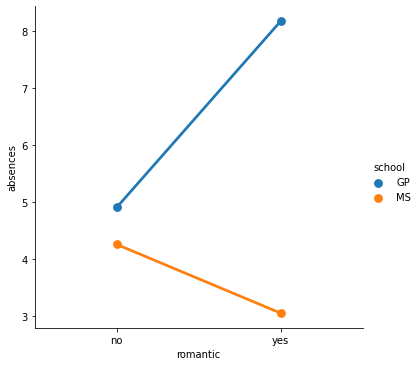

In [51]:
# Turn off the confidence intervals for this plot
sns.catplot(x='romantic', y='absences', data=student_data, 
            kind='point', hue='school', ci=None)

# Show plot
plt.show()

- Since there may be outliers of students with many absences, import the `median` function from `numpy` and display the median number of absences instead of the average.

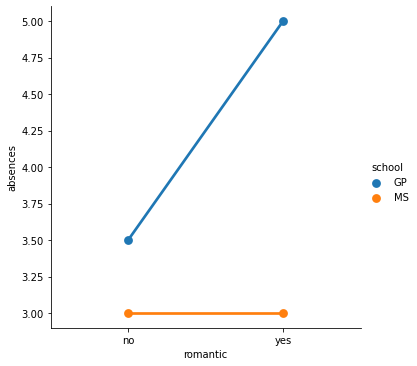

In [54]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x='romantic', y='absences', data=student_data, 
            kind='point', hue='school', ci=None, estimator=median)

# Show plot
plt.show()

*It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.*